In [57]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [58]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [59]:
# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [60]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [61]:
clinical_data=pd.read_csv(clinical_trial_data_to_load)
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [62]:
# Combine the data into a single dataset
combine_data=pd.merge(mouse_data,clinical_data,on="Mouse ID",how="outer")

In [63]:
# Display the data table for preview
combine_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [64]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor=combine_data.groupby(["Drug","Timepoint"])
groupmean=mean_tumor.mean()
mean_tumor_volume=mean_tumor["Tumor Volume (mm3)"].mean()

# calculate Mean tumor volume for selected drugs
capo_tumorVolAvg = mean_tumor_volume.loc["Capomulin", :]
infu_tumorVolAvg = mean_tumor_volume.loc["Infubinol", :]
keta_tumorVolAvg = mean_tumor_volume.loc["Ketapril", :]
plac_tumorVolAvg = mean_tumor_volume.loc["Placebo", :]
#-------------------------------------------------------
Stel_tumorVolAvg = mean_tumor_volume.loc["Stelasyn", :]
Prop_tumorVolAvg = mean_tumor_volume.loc["Propriva", :]
Naft_tumorVolAvg = mean_tumor_volume.loc["Naftisol", :]
Ceft_tumorVolAvg = mean_tumor_volume.loc["Ceftamin", :]
Rami_tumorVolAvg = mean_tumor_volume.loc["Ketapril", :]
Zoni_tumorVolAvg = mean_tumor_volume.loc["Zoniferol", :]
# Convert to DataFrame
new_data=pd.DataFrame({"Tumor Volume (mm3)":mean_tumor_volume}).reset_index()

In [65]:
# Preview DataFrame
new_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [66]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_err=combine_data.groupby(["Drug","Timepoint"])
std_err_tumor_volume=standard_err["Tumor Volume (mm3)"].sem()
std_err_tumor=(std_err_tumor_volume*100)


# Convert to DataFrame
stderr_data=pd.DataFrame({"Tumor Volume (mm3)":std_err_tumor}).reset_index()
stderr_data.round()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.0
1,Capomulin,5,45.0
2,Capomulin,10,70.0
3,Capomulin,15,84.0
4,Capomulin,20,91.0
...,...,...,...
95,Zoniferol,25,60.0
96,Zoniferol,30,80.0
97,Zoniferol,35,88.0
98,Zoniferol,40,100.0


In [67]:
# Preview DataFrame
stderr_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,44.859285
2,Capomulin,10,70.268437
3,Capomulin,15,83.861725
4,Capomulin,20,90.973069


In [68]:
# Minor Data Munging to Re-Format the Data Frames
res=std_err_tumor.replace(0,45)

# calculate standard error of tumor volume for selected drugs
capo_tumorVolerr = std_err_tumor_volume.loc["Capomulin", :]
infu_tumorVolerr = std_err_tumor_volume.loc["Infubinol", :]
keta_tumorVolerr = std_err_tumor_volume.loc["Ketapril", :]
plac_tumorVolerr = std_err_tumor_volume.loc["Placebo", :]
#---------------
stderr_data1=pd.DataFrame({"Tumor Volume (mm3)":res}).reset_index()
stderr_data1.round()
pivot_data=stderr_data1.pivot(index='Timepoint',columns='Drug')


In [69]:
# Preview DataFrame
pivot_data.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.859285  16.450481  23.510230  26.481852  20.238536   
10                 70.268437  23.614441  28.234591  35.742126  31.941506   
15                 83.861725  33.205282  35.770500  58.026797  44.437784   
20                 90.973069  35.948240  47.620951  72.648382  59.526019   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          21.809078  23.170802  48.295547  23.986248  18.895032  
10         40.206381  37.619479  72.022465  43.367836  26.394944  
15         61.446144  46.610937  77.043218  49.326107  37.054441  
20         83.960917  55.518093  78.619947  62.188884  53.318230

In [70]:
#list timepoints
timepoints = np.arange(0, 50, 5)


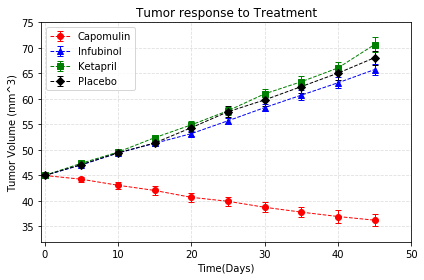

In [74]:
# Generate the Plot (with Error Bars)plot tumor vol avg with std error bars

capo_tumorErrorPlot = plt.errorbar(timepoints, capo_tumorVolAvg, capo_tumorVolerr,fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="red", label = "Capomulin")
infu_tumorErrorPlot = plt.errorbar(timepoints, infu_tumorVolAvg, infu_tumorVolerr,fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="blue", label = "Infubinol")
keta_tumorErrorPlot = plt.errorbar(timepoints, keta_tumorVolAvg, keta_tumorVolerr,fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="green",label = "Ketapril")
plac_tumorErrorPlot = plt.errorbar(timepoints, plac_tumorVolAvg, plac_tumorVolerr, fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=3,color ="black", label = "Placebo")

#formatting and titles

plt.title("Tumor response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm^3)")
plt.xlim(-.5,50,10)
plt.ylim(32,75,5)
plt.grid(linestyle="dashed")
plt.grid(alpha = .4)
plt.legend(loc="best")
plt.tight_layout()

# Save the Figure
plt.savefig("Image/TumorResponseErrorBar.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [76]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response=combine_data.groupby(["Drug","Timepoint"])
grpmean=meta_response.mean()
MetaResponse=meta_response["Metastatic Sites"].mean()

# calculate Mean tumor volume for selected drugs
capo_metaAvg = MetaResponse.loc["Capomulin", :]
infu_metaAvg = MetaResponse.loc["Infubinol", :]
keta_metaAvg = MetaResponse.loc["Ketapril", :]
plac_metaAvg = MetaResponse.loc["Placebo", :]

# Convert to DataFrame
meta_data=pd.DataFrame({"Metastatic Sites":MetaResponse})


In [77]:
# Preview DataFrame
meta_data.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [86]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_std_err=combine_data.groupby(["Drug","Timepoint"])
std_err_metasites=meta_std_err["Metastatic Sites"].sem()
std_err_metasites1=(std_err_metasites*100)

# Convert to DataFrame
meta_stderr_data=pd.DataFrame({"Metastatic Sites":std_err_metasites1}).reset_index()
meta_stderr_data.round()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.0
1,Capomulin,5,7.0
2,Capomulin,10,13.0
3,Capomulin,15,13.0
4,Capomulin,20,16.0
...,...,...,...
95,Zoniferol,25,24.0
96,Zoniferol,30,25.0
97,Zoniferol,35,29.0
98,Zoniferol,40,30.0


In [87]:
# Preview DataFrame
meta_stderr_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,7.483315
2,Capomulin,10,12.543258
3,Capomulin,15,13.204770
4,Capomulin,20,16.162094


In [96]:
# Minor Data Munging to Re-Format the Data Frames

metasites=std_err_metasites1.replace(0,45)

# calculate standard error of tumor volume for selected drugs
capo_metaSiteErr=std_err_metasites.loc["Capomulin", :]
infu_metaSiteErr=std_err_metasites.loc["Infubinol", :]
keta_metaSiteErr=std_err_metasites.loc["Ketapril", :]
plac_metaSiteErr=std_err_metasites.loc["Placebo", :]
#---------------
metaSites_data=pd.DataFrame({"Metastatic Sites":metasites}).reset_index()

pivot_data2=metaSites_data.pivot(index='Timepoint',columns='Drug')


In [97]:
# Preview that Reformatting worked
pivot_data2.head()

Metastatic Sites                                              \
Drug             Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                
0                45.000000  45.000000  45.000000  45.000000  45.000000   
5                 7.483315  10.858814   9.165151   9.810019   9.361833   
10               12.543258  15.217718  15.936381  14.201840  16.357680   
15               13.204770  18.062509  19.401475  19.138091  15.865077   
20               16.162094  24.103384  23.480115  23.667961  18.173144   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          10.094661   9.521905   6.633250   8.717798   7.770873  
10         11.526068  10.568966   9.028939  12.367184  10.910895  
15         19.022148  13.637674  11.526068  15.343912  11.167657  
20         23.406428  17.149859  11.943039  20.090498  16.637807

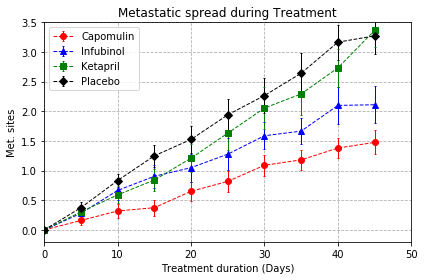

In [98]:
# Generate the Plot (with Error Bars)
timepointmeta = np.arange(0, 50, 5)
capo_metaErrorPlot = plt.errorbar(timepointmeta, capo_metaAvg, capo_metaSiteErr,fmt="o", ls="dashed", linewidth=1, alpha=1, capsize=1,color ="red",label = "Capomulin")
infu_metaErrorPlot = plt.errorbar(timepointmeta, infu_metaAvg, infu_metaSiteErr,fmt="^", ls="dashed", linewidth=1, alpha=1, capsize=1,color ="blue", label = "Infubinol")
keta_metaErrorPlot = plt.errorbar(timepointmeta, keta_metaAvg, keta_metaSiteErr,fmt="s", ls="dashed", linewidth=1, alpha=1, capsize=1,color ="green",label = "Ketapril")
plac_metaErrorPlot = plt.errorbar(timepointmeta, plac_metaAvg, plac_metaSiteErr,fmt="D", ls="dashed", linewidth=1, alpha=1, capsize=1,color ="black", label = "Placebo")

#formatting and titles
plt.hlines(45, 0, 45, alpha=0.25)
plt.title("Metastatic spread during Treatment")
plt.xlabel("Treatment duration (Days)")
plt.ylabel("Met. sites")
plt.xlim(0.0,50,5)
plt.ylim(-0.2,3.5,0.5)
plt.legend(loc="best")
plt.tight_layout()
plt.grid(linestyle="dashed")

# Save the Figure
plt.gcf()
plt.savefig("Image/MetastaticTreatmentgraph.png")
# Show the Figure
plt.show()

## Survival Rates

In [101]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_group=combine_data.groupby(["Drug","Timepoint"])
mice_count=mice_group["Mouse ID"].count()

# calculate Mean tumor volume for selected drugs
capo_micecount = mice_count.loc["Capomulin", :]
infu_micecount = mice_count.loc["Infubinol", :]
keta_micecount = mice_count.loc["Ketapril", :]
plac_micecount = mice_count.loc["Placebo", :]

# Convert to DataFrame
mice_data=pd.DataFrame({"Mouse Count":mice_count}).reset_index()


In [102]:
# Preview DataFrame
mice_data.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [103]:
# Minor Data Munging to Re-Format the Data Frames
pivot_data3=mice_data.pivot(index='Timepoint',columns='Drug')


In [104]:
# Preview the Data Frame
pivot_data3.head()


Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

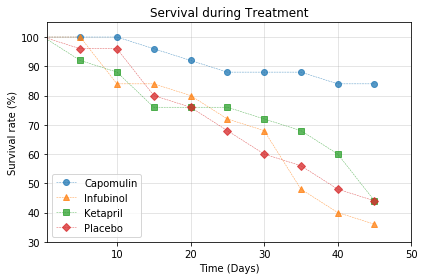

In [112]:
# Generate the Plot (Accounting for percentages)
#convert mouse counts to % of starting mice
capo_survivalPerc = capo_micecount / capo_micecount.iloc[0] * 100
infu_survivalPerc = infu_micecount / infu_micecount.iloc[0] * 100
keta_survivalPerc = keta_micecount / keta_micecount.iloc[0] * 100
plac_survivalPerc = plac_micecount / plac_micecount.iloc[0] * 100

#plot each drug's mouse count over time
capo_tumorVolPlot = plt.plot(timepoints, capo_survivalPerc, marker = "o",linestyle='dashed',linewidth=0.5, label = "Capomulin", alpha = .75)
infu_tumorVolPlot = plt.plot(timepoints, infu_survivalPerc, marker = "^",linestyle='dashed',linewidth=0.5, label = "Infubinol", alpha = .75)
keta_tumorVolPlot = plt.plot(timepoints, keta_survivalPerc, marker = "s",linestyle='dashed',linewidth=0.5, label = "Ketapril", alpha = .75)
plac_tumorVolPlot = plt.plot(timepoints, plac_survivalPerc, marker = "D",linestyle='dashed',linewidth=0.5, label = "Placebo", alpha = .75)

#formatting and titles

plt.title("Servival during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival rate (%)")
plt.xlim(0.5,50)
plt.ylim(30,105,10)
plt.legend(loc="best")
plt.grid(alpha = .4)
plt.tight_layout()


# Save the Figure
plt.gcf()
plt.savefig("Image/Servivalgraph.png")


# Show the Figure
plt.show()


## Summary Bar Graph

In [114]:
# Calculate the percent changes for each drug

capo_tumorPercChange = (capo_tumorVolAvg[9] / capo_tumorVolAvg[0] * 100) - 100
infu_tumorPercChange = (infu_tumorVolAvg[9] / infu_tumorVolAvg[0] * 100) - 100
keta_tumorPercChange = (keta_tumorVolAvg[9] / keta_tumorVolAvg[0] * 100) - 100
plac_tumorPercChange = (plac_tumorVolAvg[9] / plac_tumorVolAvg[0] * 100) - 100
Stel_tumorPercChange=(Stel_tumorVolAvg[9]/Stel_tumorVolAvg[0]*100)-100
Prop_tumorPercChange=(Prop_tumorVolAvg[9]/Prop_tumorVolAvg[0]*100)-100
Naft_tumorPercChange=(Naft_tumorVolAvg[9]/Naft_tumorVolAvg[0]*100)-100
Ceft_tumorPercChange=(Ceft_tumorVolAvg[9]/Ceft_tumorVolAvg[0]*100)-100
Rami_tumorPercChange=(Rami_tumorVolAvg[9]/Rami_tumorVolAvg[0]*100)-100
Zoni_tumorPercChange=(Zoni_tumorVolAvg[9]/Zoni_tumorVolAvg[0]*100)-100

#list tumor % changes
tumorPercList = [capo_tumorPercChange, infu_tumorPercChange, keta_tumorPercChange, plac_tumorPercChange,Stel_tumorPercChange,Prop_tumorPercChange,Naft_tumorPercChange,Ceft_tumorPercChange,Rami_tumorPercChange,Zoni_tumorPercChange]
#list of Drugs
druglist=['Capomulin','Infubinol','Ketapril', 'Placebo','Stelasyn', 'Propriva', 'Naftisol', 'Ceftamin', 'Ramicane','Zoniferol' ]
#create table with drug and tumor % change
tumorPercTable = pd.DataFrame({"Drug": druglist, "Tumor Percent Change": tumorPercList})



In [115]:
# Display the data to confirm
tumorPercTable.head(10)

,Drug,Tumor Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960
4,Stelasyn,52.085134
5,Propriva,47.241175
6,Naftisol,53.923347
7,Ceftamin,42.516492
8,Ramicane,57.028795
9,Zoniferol,46.579751


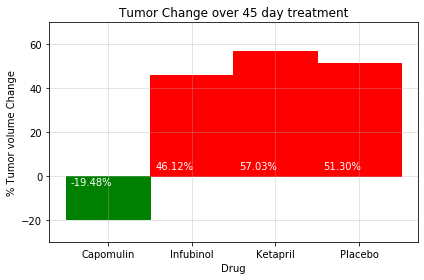

In [127]:
# Store all Relevant Percent Changes into a Tuple
drugL=('Capomulin','Infubinol','Ketapril','Placebo')
tumerp=(capo_tumorPercChange, infu_tumorPercChange, keta_tumorPercChange, plac_tumorPercChange)
tumorPercTable = pd.DataFrame({"Drug": drugL, "Tumor Percent Change": tumerp})
tumorPercTable

# Splice the data between passing and failing drugs
tumorBarChart = plt.bar(tumorPercTable["Drug"], tumorPercTable["Tumor Percent Change"],width=1.0)

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change over 45 day treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor volume Change")
#plt.xlim(0,200)
plt.ylim(-30,70,20)
plt.grid(alpha = .4)
plt.tight_layout()

# Use functions to label the percentages of changes
for i in range(len(drugL)):
    if tumorPercList[i] < 0:
        tumorBarChart[i].set_color("green")
        percText = format(tumorPercList[i] / 100, ".2%")
        plt.text(-.2 + i, -5, percText, color="w",ha='center', va='bottom')
    else:
        tumorBarChart[i].set_color("red")
        percText = format(tumorPercList[i] / 100, ".2%")
        plt.text(-.2 + i, 2, percText, color = "w",ha='center', va='bottom')




# Save the Figure
plt.savefig("Image/Tumerchangeover45day.png")

# Show the Figure
plt.show()
